![logo price](./imgs/massp_logo.png)

## Instructors
* Vương Phúc Thành


#  Bài toán Giới thiệu về pipeline cho một bài toán Machine learning
![home price](./imgs/wine-dataset.jpeg)





###  Mô tả :
Bài toán đưa ra yêu cầu chúng ta phân loại và chấm điểm chất lượng rượu dựa vào các chỉ số thành phần của rượu. 
- Đầu vào: một bảng thông tin tổng quan các chỉ số của rượu
- Đầu ra: chất lượng rượu, đánh số từ 0 đến 10

Mục tiêu: Xây dựng mô hình học máy dựa trên tập training (bao gồm đầu vào và đầu ra) để dự đoán chất lượng của rượu

## Prediction of Wine quality

## Outline

- <a href='#1'>1. Problem defining</a>

- <a href='#2'>2. Khai phá dữ liệu </a>  

- <a href='#3'>3. Data analyzing - Phân tích dữ liệu </a>
    - <a id='#3.1'>3.1. Tổng quan trường target </a>
    - <a id='#3.2'>3.2. Metric đánh giá </a> 
    - <a id='#3.3'>3.3. Khai phá dữ liệu </a> 
- <a href='#4'>4. Feature engineering </a>
    - <a id='#4-1'>4.1. Log transform </a>
    - <a id='#4-2'>4.2. Xử lí imbalanced data</a> 
    - <a id='#4-3'>4.3. Xử lí null data</a> 
- <a href='#5'>5. Modeling and evaluating </a>
  

### <a id='1'>1. Problem defining

 Chúng ta sẽ sử dụng model classification để phân loại rượu vào thang điểm từ 0 - 10. Đối với bài classification sẽ là 10 classes.

### <a id='2'>2. Data collecting

Đối với bài toán này ta đã có sẵn 1 tập data trong file csv, có thể load và sử dụng ngay, không cần qua các bước thu thập và load vào database.

In [1]:
## import các thư viện cần thiết
import os  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

from IPython.display import Image

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("winequalityN.csv")
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


### <a id='3'> 3. Data analyzing

In [4]:
## Một vài thông tin tổng quan tập dữ liệu:
print("Kích thước tập dữ liệu: {}".format(df.shape))

Kích thước tập dữ liệu: (6497, 13)


#### <a id='3.1'> 3.1 Tổng quan trường target (quality)


In [5]:
df['quality'].describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='count'>

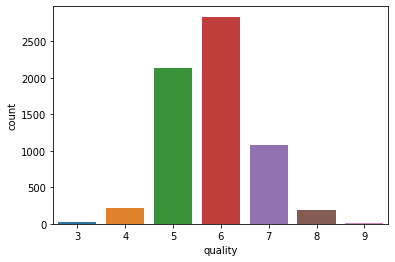

In [6]:
## phân bố cột dữ liệu quality
sns.countplot(df['quality'])

Nhận xét: số lượng rượu với quality 5 và 6 lớn hơn nhiều lần so với các class khác. Nếu ta giữ nguyên phân bố như vậy, có thể sẽ có vấn đề khi dự đoán chất lượng của rượu, do dữ liệu bị imbalanced. 
=> Chúng ta có thể xử lí bằng cách giảm số lượng class 5 và 6 xuống (undersampling) hoặc tăng số lượng các class khác lên (oversampling) 

#### <a id='3.2'> 3.2 Metric đánh giá:

- Đối với 1 bài toán Ordinal Regression, chúng ta có thể sử dùng công thức Mean squared error (Ước lượng trung bình bình phương sai số):


In [7]:
Image(url='./imgs/MSE.jpg', width=400)

- Đối với 1 bài toán classification, ở đây ta chia label bài toán ra làm 10 classes khác nhau, có thể dùng confusion matrix và f1-score để đánh giá:

In [8]:
Image(url='./imgs/cm_2.png', width=400)

In [9]:
Image(url='./imgs/F1-Score.png', width=400)

In [10]:
#Trong đó
Image(url='./imgs/precision_recall.jpeg', width=400)

#### Đặt câu hỏi và giải đáp về các metrics !?

Chúng ta sẽ nhìn qua bộ dữ liệu, xử lí dữ liệu nhiễu và dữ liệu bị thiếu, kiểm tra type của các cột và điều chỉnh lại cho chuẩn
để sử dụng cho việc phân tích.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [12]:
## Số lượng missing values của từng cột 
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

#### <a id='3.3'>3.3 Data exploratory

Có 12 trường tất cả, vậy việc phân tích dữ liệu sẽ không quá phức tạp, chúng ta sẽ nhìn qua từng trường một. Đầu tiên, nhìn qua phần summary của dataset:

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Đầu tiên cần nhận thấy rằng các trường đang phân bố ở các scale khác nhau, vậy sau này ta sẽ cần rescale lại data.
Có 1 trường object duy nhất, ta sẽ kiểm tra xem liệu màu của rượu (đỏ hoặc trắng) có ảnh hưởng nhiều đến quality hay ko?

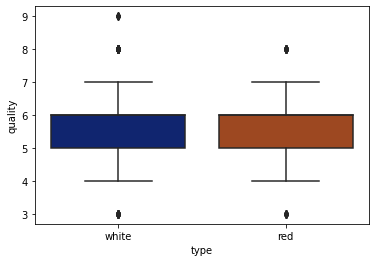

In [14]:
sns.boxplot(x="type",y="quality",data=df, palette="dark")
plt.show()

=> nhận thấy rằng type của rượu k ảnh hưởng gì nhiều đến quality của nó, ta có thể drop cột này.

Cùng nhìn qua phân bố của các class

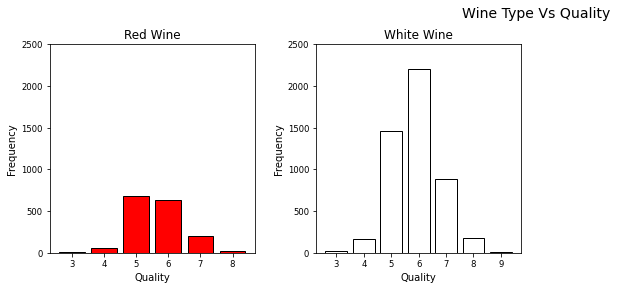

In [15]:
fig = plt.figure(figsize = (18, 4))
title = fig.suptitle("Wine Type Vs Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,4, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = df.quality[df.type == 'red'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', edgecolor='black', linewidth=1)


ax2 = fig.add_subplot(1,4, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = df.quality[df.type == 'white'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', edgecolor='black', linewidth=1)


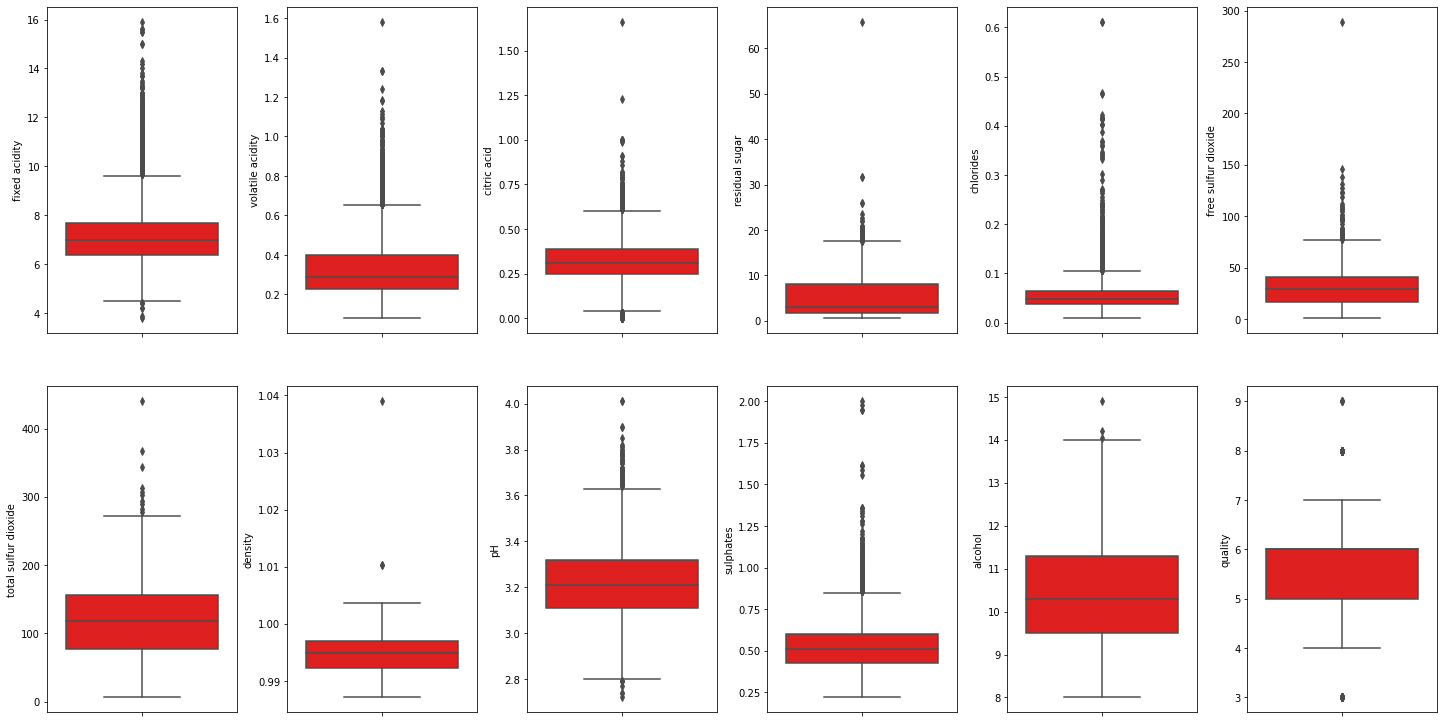

In [16]:
#Kiểm tra outlier của data
# tạo box plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, color='r', ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

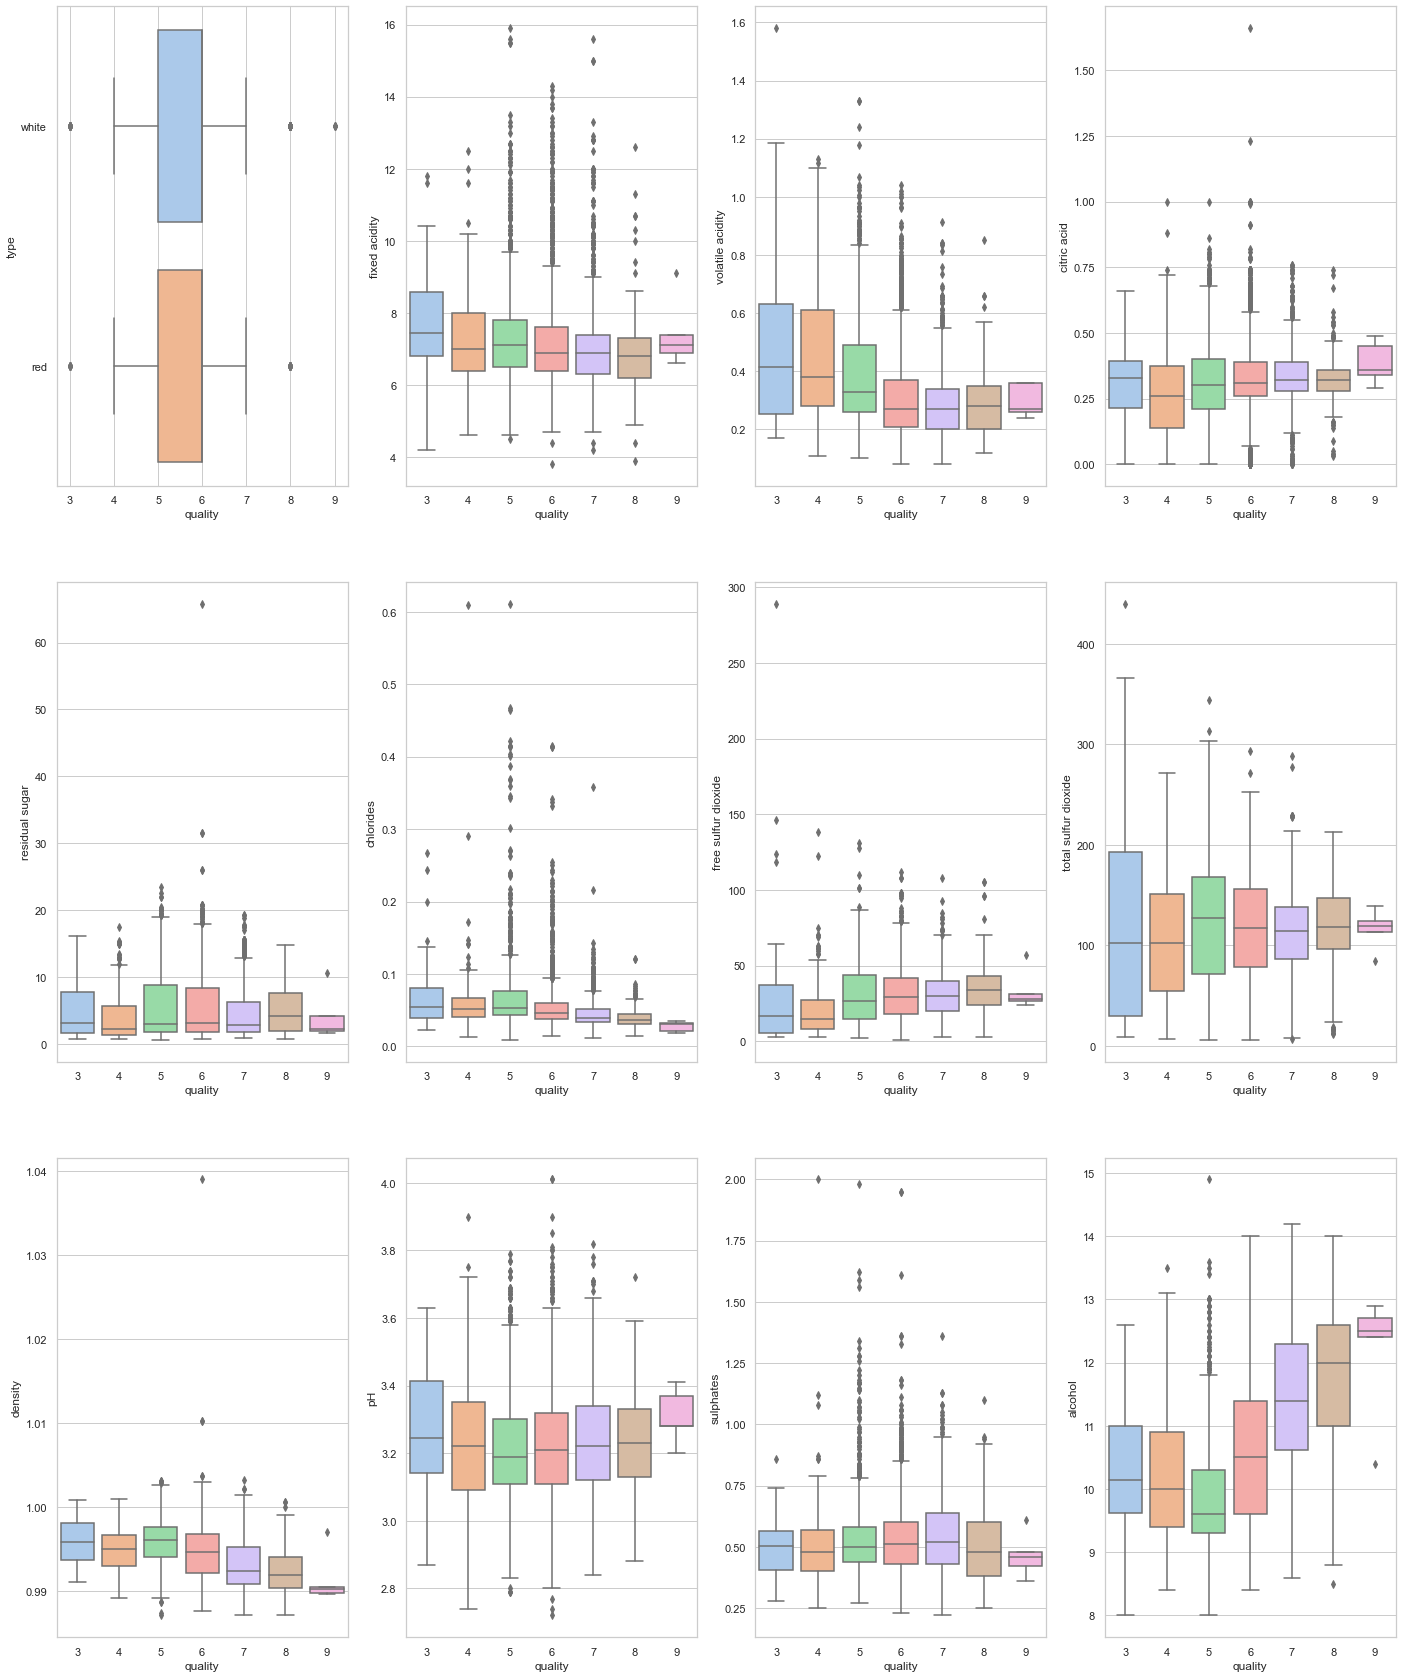

In [17]:
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(df.columns)
for i in range(3):
    for j in range(4):
            sns.boxplot(df['quality'], df[columns[k]], ax = ax1[i][j], palette='pastel')
            k += 1
plt.show()

Nhận xét: hầu hết các trường đều có outlier! 

<AxesSubplot:>

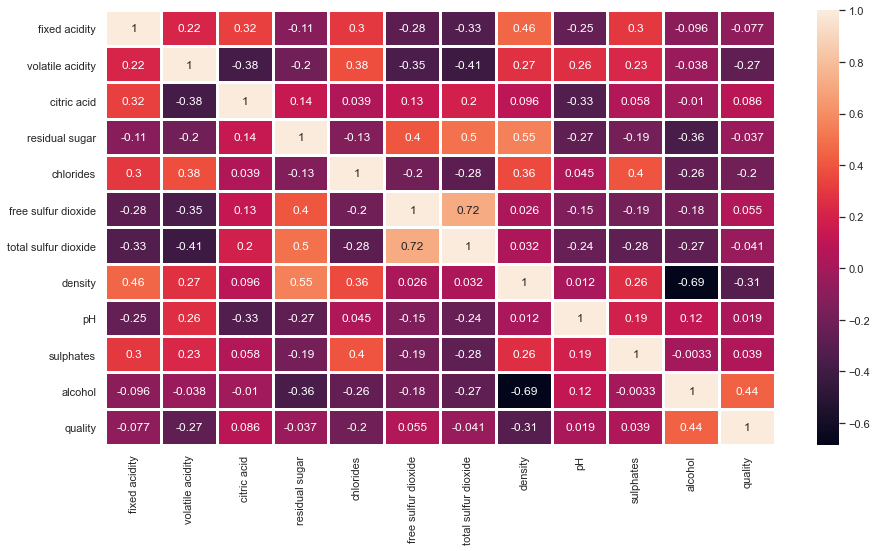

In [18]:
#Sử dụng heat map để tìm correlation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, linewidths=2)

- Ma trận heatmap là cách tốt nhất để thấy được mối quan hệ giữa các trường số với nhau.
- Mỗi tọa độ của ma trận thể hiện mối tương quan giữa 2 cột.
- Correlation càng gần 1, thì 2 trường càng có sự giống nhau.
- Nếu các trường (khác target) có correlation cao, có thể xem xét bỏ đi một cột.
- Nếu một trường có correlation cao với target, thì trường đó được xem xét như một feature quan trọng.

1 vài insights từ bảng trên:
- tỉ lệ alcohol trong rượu đồng biến với quality => alcohol nhiều thì rượu chất lượng càng cao
- alcohol và ph có mối liên hệ yếu, không đáng kể
- Citric acid và density có mối tương quan khá mạnh với fixed acidity.
- pH nghịch biến với density, fixed acidity, citric acid, and sulfates.

Text(0, 0.5, 'Features')

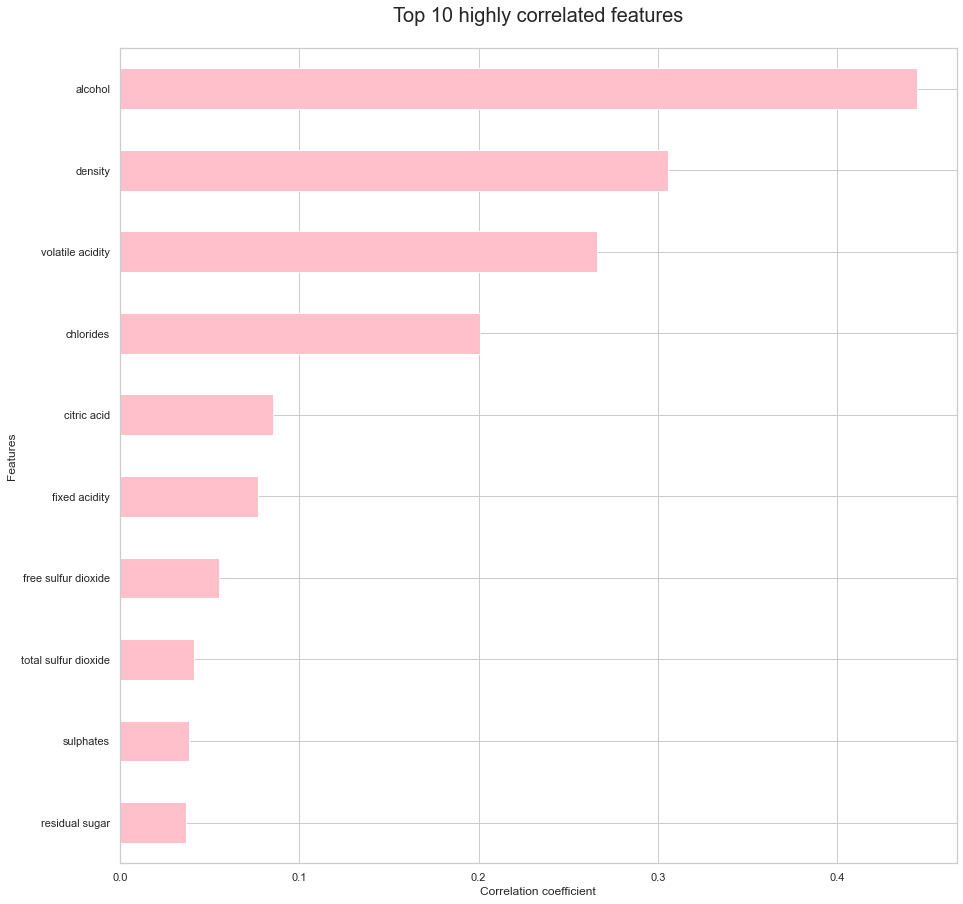

In [19]:
plt.figure(figsize=(15,15))
df.corr().quality.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:11][::-1].plot(kind='barh',color='pink') 
# calculating the top 10 highest correlated features
# with respect to the target variable i.e. "quality"
plt.title("Top 10 highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

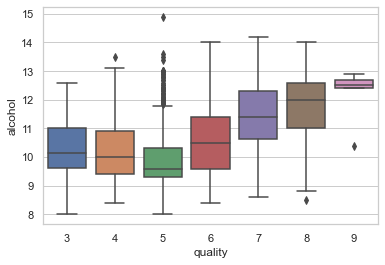

In [20]:
### Đánh giá alcohol vs quality
sns.boxplot(x='quality', y='alcohol', data = df)

- Các chấm đen thể hiện đó là outlier, chủ yếu ở những chai rượu có quality = 5, ta có thể bỏ qua outlier bằng cách thêm argument showoutliers=False  

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

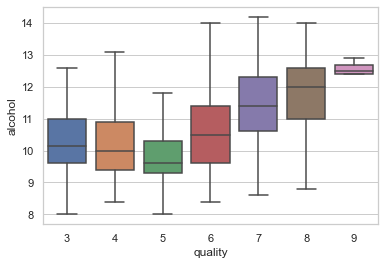

In [21]:
sns.boxplot(x='quality', y='alcohol', data = df, showfliers=False)

=> Nồng độ alcohol cao => chất lượng rượu càng cao

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

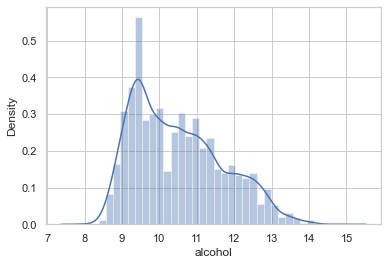

In [22]:
# Xem phân bố của cột alchohol
sns.distplot(df['alcohol'])

Ta có thể thấy rằng phần bố của alcohol skew với chất lượng của rượu. Kiểm tra mức độ skew của phân bố sử dụng scipy.stats

In [23]:
from scipy.stats import skew
skew(df['alcohol'])

0.5655871101918292

<Figure size 1080x576 with 0 Axes>

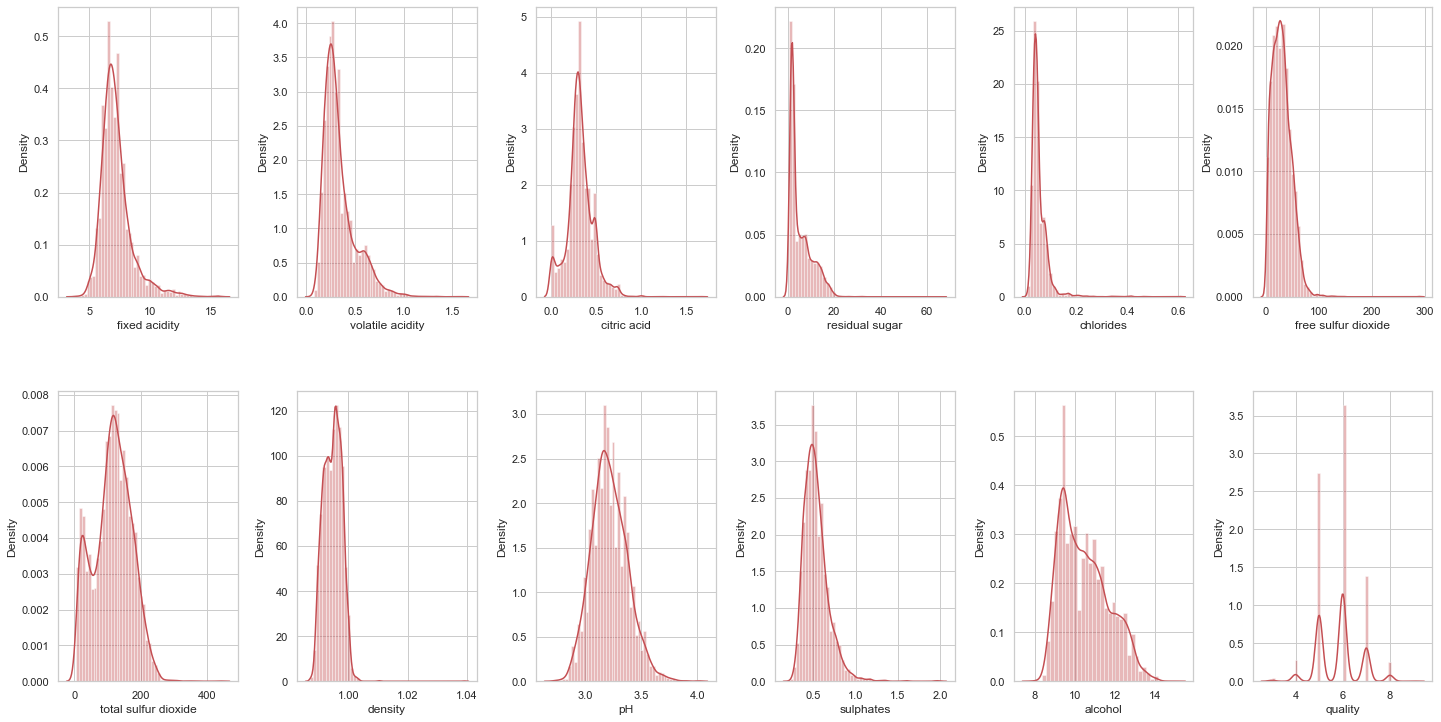

In [24]:
## Vẽ phân bố của tất cả các field trong tập dữ liệu
plt.figure(figsize=(15,8))
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, color='r', ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

- Các hình trên biểu diễn phân bố của từng cột dữ liệu
- Có các features có phân bố chuẩn, còn lại chủ yếu là right skew distribution. Range của từng feature cũng ko quá rộng
- Ta cần transform các skewed feature, sử dụng log transfrom sẽ giải quyết được vấn đề!

### <a id='4'> 4. Feature Engineering

1 vài step chúng ta cần xử lí dữ liệu sau khi đã phân tích qua các features:
- Fill null values
- log transform
- rescale data
- xử lí imbalanced data

#### <a id='4.1'> 4.1 Log transform

- ví dụ về output của log_transform

In [25]:
def log_transform(col):
    return np.log(col)

fixed_acidity_transformed = df[['fixed acidity']].apply(log_transform, axis=1)
chlorides_transformed = df[['chlorides']].apply(log_transform, axis=1)
free_sulfur_dioxide_transformed = df[['free sulfur dioxide']].apply(log_transform, axis=1)
sulphates_transformed = df[['sulphates']].apply(log_transform, axis=1)

<AxesSubplot:ylabel='Density'>

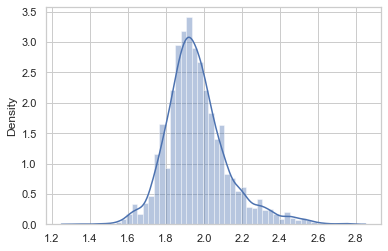

In [26]:
## Vẽ phân bố của tất cả các field trong tập dữ liệu
sns.distplot(fixed_acidity_transformed)

<AxesSubplot:ylabel='Density'>

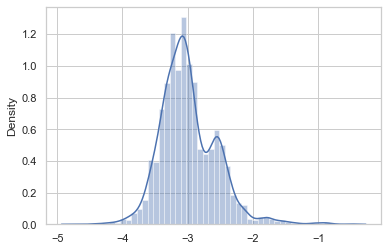

In [27]:
sns.distplot(chlorides_transformed)

<AxesSubplot:ylabel='Density'>

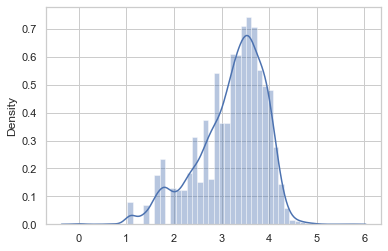

In [28]:
sns.distplot(free_sulfur_dioxide_transformed)

<AxesSubplot:ylabel='Density'>

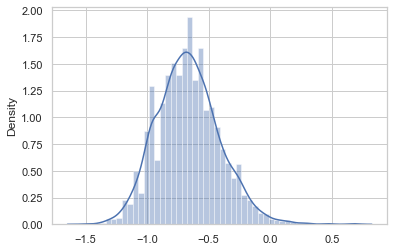

In [29]:
sns.distplot(sulphates_transformed)

In [30]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085706
free sulfur dioxide     0.055463
sulphates               0.038729
pH                      0.019366
residual sugar         -0.036825
total sulfur dioxide   -0.041385
fixed acidity          -0.077031
chlorides              -0.200886
volatile acidity       -0.265953
density                -0.305858
Name: quality, dtype: float64

- correlation giữa các feature với target không cao lắm, nhưng có thể thấy các feature quan trọng là alcohol, density, volatile acidity

In [31]:
# hàm xử lí log_transform
def log_transform(col):
    return np.log(col[0])

df['fixed acidity']= df[['fixed acidity']].apply(log_transform, axis=1)
df['chlorides'] = df[['chlorides']].apply(log_transform, axis=1)
df['free sulfur dioxide'] = df[['free sulfur dioxide']].apply(log_transform, axis=1)
df['sulphates'] = df[['sulphates']].apply(log_transform, axis=1)

#### <a id='4.2'> 4.2 Xử lí imbalanced data

![home price](./imgs/smote.png)

- The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfishing.



- In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

In [32]:
df_3 = df[df.quality==3]     # MINORITY          
df_4 = df[df.quality==4]     # MINORITY          
df_5 = df[df.quality==5]     # MAJORITY
df_6 = df[df.quality==6]     # MAJORITY
df_7 = df[df.quality==7]     # MINORITY
df_8 = df[df.quality==8]     # MINORITY
df_9 = df[df.quality==9]     # MINORITY

In [33]:
# Oversample MINORITY Class to make balance data :
from sklearn.utils import resample

df_3_upsampled = resample(df_3, replace=True, n_samples=2000) 
df_4_upsampled = resample(df_4, replace=True, n_samples=2000) 
df_7_upsampled = resample(df_7, replace=True, n_samples=2000) 
df_8_upsampled = resample(df_8, replace=True, n_samples=2000) 
df_9_upsampled = resample(df_9, replace=True, n_samples=2000) 
# Decreases the rows of Majority one's to make balance data :
df_5_downsampled = df[df.quality==5].sample(n=2000).reset_index(drop=True)
df_6_downsampled = df[df.quality==6].sample(n=2000).reset_index(drop=True)

In [34]:
# Combine downsampled majority class with upsampled minority class
Balanced_df = pd.concat([df_3_upsampled, df_4_upsampled, df_7_upsampled, 
                         df_8_upsampled, df_5_downsampled, df_6_downsampled, df_9_upsampled ]).reset_index(drop=True)


# Display new class counts
Balanced_df.quality.value_counts()           

7    2000
6    2000
5    2000
4    2000
3    2000
9    2000
8    2000
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

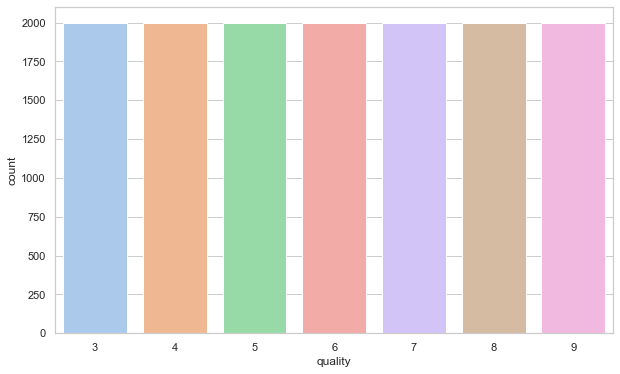

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='quality', data=Balanced_df, order=[3, 4, 5, 6, 7, 8, 9], palette='pastel')

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

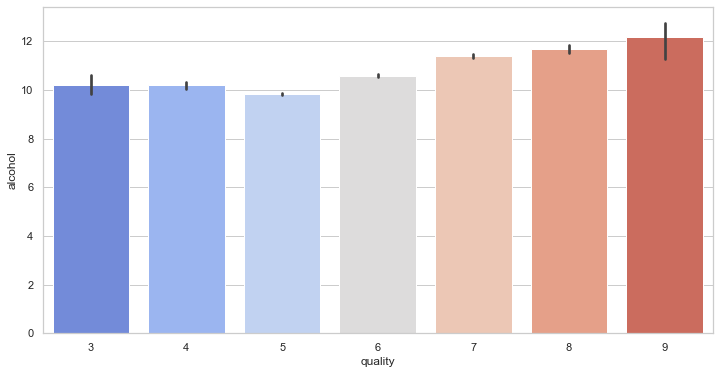

In [36]:
plt.figure(figsize = (12,6))
sns.barplot(x='quality', y = 'alcohol', data = df, palette = 'coolwarm')

Text(0, 0.5, 'Features')

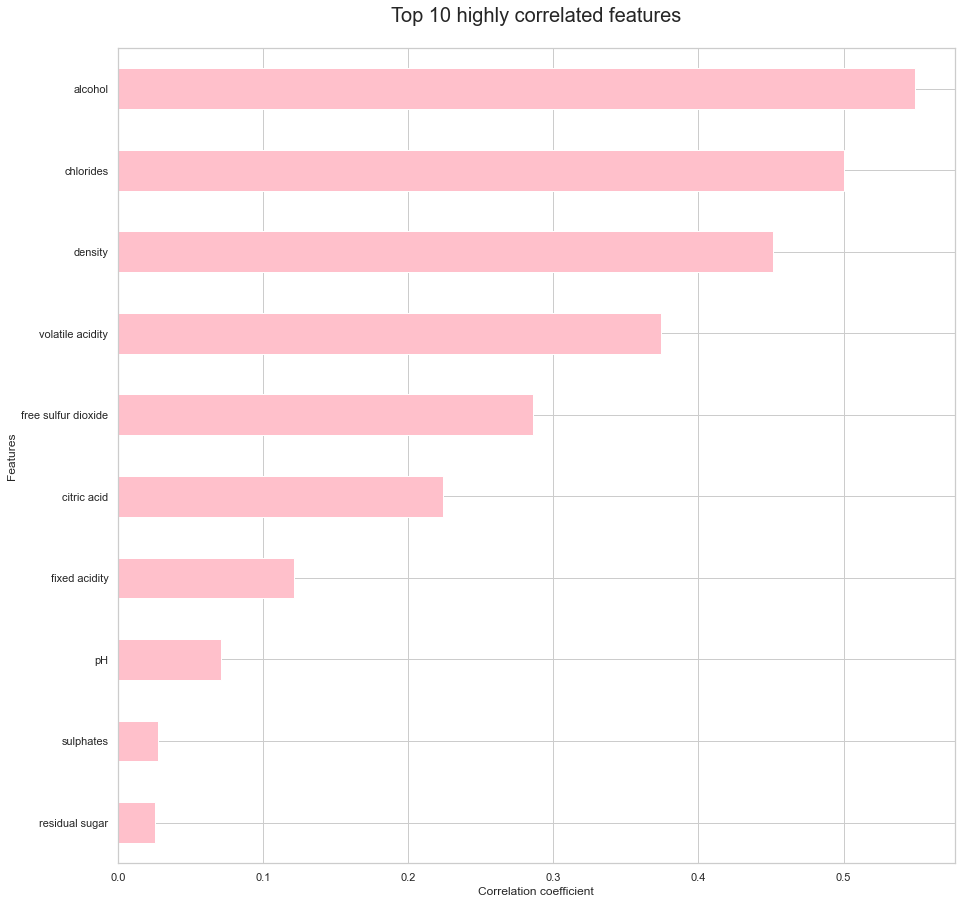

In [37]:
plt.figure(figsize=(15,15))
Balanced_df.corr().quality.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:11][::-1].plot(kind='barh',color='pink') 
# calculating the top 10 highest correlated features
# with respect to the target variable i.e. "quality"
plt.title("Top 10 highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

- Không làm thay đổi về correlation giữa Feature và target!

#### <a id='4.3'>4.3 Fill null values

##### Xử lí missing data
Có thể nhận thấy số lượng missing value khá ít, nên ta có thể fill các giá trị này bằng 1 số cách như sau:
- Fill với mean: fill các giá trị null với giá trị mean của phân bố, đối với các skewed feature, sử dụng mean để fill các giá trị null có thể làm sai phân bố dữ liệu
- Fill với median: fill các giá trị null với giá trị median của phân bố, sử dụng giá trị median này không làm thay đổi phân bố dữ liệu 
- Fill với giá trị có frequency nhiều nhất trong cột đó
- Fill với 1 giá trị cố định: 0 hoặc 1.

Trong trường hợp missing value quá nhiều thì sẽ không thể fill ngay, sẽ làm sai phân bố của dữ liệu từ đó làm sai việc thuật toán, tốt nhất nên trace xem lí do missing và có thể fill bằng cách nào? Khi việc fill giá trị missing trở nên risky thì nên drop luôn cột đó đi :) 

In [38]:
## Hàm xử lí missing value
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """
        Impute missing values:
        - Columns of dtype object are imputed with the most frequent value in column.
        - Columns of other types are imputed with mean of column.
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

Việc scaler chúng ta sẽ sử dụng StandardScaler có sẵn trong sklearn cho việc rescale lại các giá trị trong dataset

In [39]:
from sklearn.model_selection import train_test_split

cols = Balanced_df.columns
cols = list(cols.drop(['type','quality']))
y=Balanced_df["quality"]
X_train, X_test, y_train, y_test = train_test_split(Balanced_df.loc[:, cols], y, test_size=0.33, random_state=12)

In [40]:
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,9370.000000,9376.000000,9380.000000,9379.000000,9373.000000,9380.000000,9380.000000,9380.000000,9374.000000,9369.000000,9380.000000
mean,1.971156,0.365605,0.319183,5.060241,-3.087824,3.160971,115.016205,0.994056,3.240623,-0.698592,10.853642
std,0.170441,0.208694,0.142308,4.375695,0.496172,0.791522,62.407503,0.003169,0.164788,0.256245,1.339364
min,1.360977,0.080000,0.000000,0.600000,-4.710531,0.000000,6.000000,0.987110,2.740000,-1.386294,8.000000
25%,1.871802,0.240000,0.260000,1.800000,-3.411248,2.708050,80.000000,0.991200,3.140000,-0.867501,9.700000
50%,1.960095,0.300000,0.320000,2.900000,-3.146555,3.332205,117.000000,0.993950,3.240000,-0.713350,10.700000
75%,2.041220,0.415000,0.400000,7.600000,-2.830218,3.663562,147.000000,0.996800,3.360000,-0.527633,12.100000
max,2.747271,1.580000,1.660000,26.050000,-0.492658,5.666427,440.000000,1.003690,3.900000,0.683097,14.200000


### <a id='5'> 5. Modeling and evaluating for regression:

#### Hồi quy tuyến tính

- Khi sử dụng hồi quy tuyến tính, mục tiêu của chúng ta là để làm sao một đường thẳng có thể tạo được sự phân bố gần nhất với hầu hết các điểm. Do đó làm giảm khoảng cách (sai số) của các điểm dữ liệu cho đến đường đó.
- Trong không gian hai chiều, một hàm số được gọi là tuyến tính nếu đồ thị của nó có dạng một đường thẳng. Trong không gian ba chiều, một hàm số được goi là tuyến tính nếu đồ thị của nó có dạng một mặt phẳng. Trong không gian nhiều hơn 3 chiều, khái niệm mặt phẳng không còn phù hợp nữa, thay vào đó, một khái niệm khác ra đời được gọi là siêu mặt phẳng (hyperplane).

In [41]:
from sklearn.linear_model import LinearRegression


In [42]:
from sklearn.pipeline import Pipeline

In [43]:
LR = Pipeline([
        ('imputer', DataFrameImputer()),
        ('scl', StandardScaler()),
        ('lr',  LinearRegression())
 ])  

LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [44]:
x = LR.predict(X_train)

In [45]:
print("Train rmse: " + str(mean_squared_error(y_train, x)**0.5))
print("Test rmse: " + str(mean_squared_error(y_test, y_pred)**0.5))

Train rmse: 1.3938000364458016
Test rmse: 1.3761225253092397


- so với scale 0-10, thì RMSE ở đây không lớn
- Rmse bộ test nhỏ hơn bộ train => có thể không bị overfit

#### <a id='5.1'> 5.1 Ordinal Classification với 10 classes sử dụng K nearest neightbors

- Giới thiệu về KNN

KNN (K-Nearest Neighbors) là một thuật toán đơn giản nhất trong nhóm thuật toán Học có giám sát.  Ý tưởng của thuật toán này đó là tìm output của một dữ liệu mới dựa trên output của K điểm gần nhất xung quanh nó. KNN được ứng dụng nhiều trong khai phá dữ liệu và học máy. Trong thực tế, việc đo khoảng cách giữa các điểm dữ liệu, chúng ta có thể sử dụng rất nhiều độ đo, tiêu biểu như là  manhattan, euclide, cosine,…

In [74]:
Image(url='./imgs/knn.png', width=400)

Ví dụ như hình trên, để gán nhãn cho điểm dữ liệu hình sao, ta xét K = 3 điểm gần nhất xung quanh nó. Nhận thấy trong 3 điểm đó, có 2 điểm thuộc class B và 1 điểm thuộc class A. Như vậy ta sẽ gán nhãn cho điểm hình sao sẽ thuộc về class B

Thuật toán của KNN có thể được mô tả như sau:

Thuật toán:
- Xác định tham số K số làng giềng gần nhất
- Tính khoảng cách của đối tượng cần phân lớp tới tất cả các đối tượng có trong tập train
- Lấy top K cho giá trị nhỏ nhất (hoặc lớn nhất)
- Trong top K giá trị vừa lấy, ta thống kê số lượng của mỗi lớp, chọn phân lớp cho số lượng lớn nhất

Vậy K bằng bao nhiêu thì tốt ? ta sẽ cần phải thực nghiệm nhiều lần, và chọn K sao cho kết quả output là tốt nhất

In [46]:
from sklearn.neighbors import KNeighborsClassifier
KNN = Pipeline([
        ('imputer', DataFrameImputer()),
        ('scl', StandardScaler()),
        ('clf',  KNeighborsClassifier())
 ])  

KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.99      1.00      0.99       664
           4       0.80      0.99      0.89       628
           5       0.62      0.56      0.59       638
           6       0.55      0.38      0.45       686
           7       0.70      0.69      0.70       651
           8       0.84      0.99      0.91       649
           9       1.00      1.00      1.00       704

    accuracy                           0.80      4620
   macro avg       0.79      0.80      0.79      4620
weighted avg       0.79      0.80      0.79      4620

[[664   0   0   0   0   0   0]
 [  1 624   1   0   0   2   0]
 [  4  95 359 115  54  11   0]
 [  3  54 184 260 133  52   0]
 [  0   9  33  97 451  61   0]
 [  0   0   0   0   5 644   0]
 [  0   0   0   0   0   0 704]]


In [48]:
# ~> classification với 10 classes cho ra điểm khá thấp

In [49]:
# For weights = 'uniform'
for n_neighbors in [5,10,15,20]:
    KNN = Pipeline([
        ('imputer', DataFrameImputer()),
        ('scl', StandardScaler()),
        ('clf',  KNeighborsClassifier(n_neighbors=n_neighbors))
     ])  
    KNN.fit(X_train, y_train) 
    scr = KNN.score(X_test, y_test)
    print("For n_neighbors = ", n_neighbors  ," score is ",scr)

For n_neighbors =  5  score is  0.8021645021645022
For n_neighbors =  10  score is  0.7577922077922078
For n_neighbors =  15  score is  0.7251082251082251
For n_neighbors =  20  score is  0.6935064935064935


In [50]:
# For weights = 'distance'
for n_neighbors in [5,10,15,20]:
    KNN = Pipeline([
        ('imputer', DataFrameImputer()),
        ('scl', StandardScaler()),
        ('clf',  KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance'))
     ])  
    KNN.fit(X_train, y_train) 
    scr = KNN.score(X_test, y_test)
    print("For n_neighbors = ", n_neighbors  ," score is ",scr)

For n_neighbors =  5  score is  0.8577922077922078
For n_neighbors =  10  score is  0.8458874458874459
For n_neighbors =  15  score is  0.8413419913419914
For n_neighbors =  20  score is  0.8383116883116883


#### <a id='5.2'> 5.2 Classification với 3 classes

In [51]:
Balanced_df['quality_label'] = Balanced_df.quality.apply(lambda q: 'bad' if q <= 5 else 'good' if q <= 7 else 'excellent')

In [52]:
cols = Balanced_df.columns
cols = list(cols.drop(['type', 'quality_label','quality']))
y=Balanced_df["quality_label"]
X_train, X_test, y_train, y_test = train_test_split(Balanced_df.loc[:, cols], y, test_size=0.33, random_state=42)

In [53]:
from sklearn.ensemble import RandomForestClassifier
KNN = Pipeline([
        ('imputer', DataFrameImputer()),
        ('scl', StandardScaler()),
        ('clf',  KNeighborsClassifier())
 ])  

KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)

labels = np.unique(y_test)
print(classification_report(y_test,y_pred))

cf_matrix_df =  confusion_matrix(y_test, y_pred, labels=labels)

pd.DataFrame(cf_matrix_df, index=labels, columns=labels)

              precision    recall  f1-score   support

         bad       0.88      0.90      0.89      2012
   excellent       0.90      0.99      0.94      1289
        good       0.83      0.73      0.78      1319

    accuracy                           0.88      4620
   macro avg       0.87      0.87      0.87      4620
weighted avg       0.87      0.88      0.87      4620



,bad,excellent,good
bad,1805,18,189
excellent,0,1278,11
good,238,120,961
